# İçindekiler
### -Veri setinin özeti
### -Veri setindeki değişkenler
### -Kütüphanelerin yüklenmesi
### -Veri setini okuma
### -Veri ilk bakış
### -Değişkenler arası ilişkinin görselleştirilmesi
### -Veri setinin dengeli hale getirilmesi
### -Model Kurulumu
### -Performans metrik ölçümlerinin raporlanması
### -Roc Curve Çizdirilmesi


# ----------------------------------------------------------------------

### Veri setinin özeti
veri seti, Portekiz "Vinho Verde" şarabının kırmızı ve beyaz çeşitleriyle ilgilidir.Gizlilik ve lojistik sorunlar nedeniyle, yalnızca fizikokimyasal (girdiler) ve duyusal (çıktı) değişkenler mevcuttur (ör. üzüm türleri, şarap markası, şarap satış fiyatı vb. hakkında veri yoktur).

### Veri Setindeki Değişkenler
sabit asit /
uçucu asitliği
sitrik asit
artık şeker
klorürler
serbest sülfür dioksit
toplam sülfür dioksit
yoğunluk
pH
sülfatlar
alkol
kalite

### Kütüphanelerin yüklenmesi

In [1]:
import pandas as pd
import verı_modulum as modul
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,label_binarize
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn.metrics import  auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes  import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import seaborn as sns

### Veri setini okuma

In [2]:
df=pd.read_csv(r"C:\Users\umuts\Downloads\winequality-red.csv")

### Veri ilk bakış

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Eksik değer analizi
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Değişkenler arası ilişkinin görselleştirilmesi

In [7]:
# Korelasyon matrisine bakılması
df.corr().style.background_gradient(cmap="Blues")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

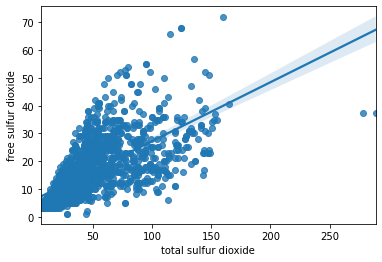

In [8]:
sns.regplot(x = "total sulfur dioxide", 
            y = "free sulfur dioxide", 
            data = df)

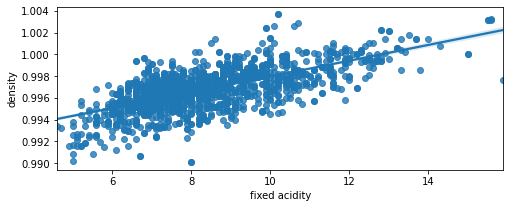

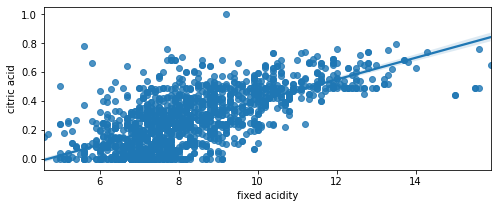

In [9]:
for col in df[["density","citric acid"]]:
    if not col == "fixed acidity":
        fig = plt.figure(figsize = (8,3))
        sns.regplot(x = 'fixed acidity', y = col, data = df)

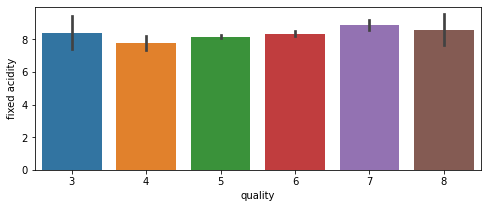

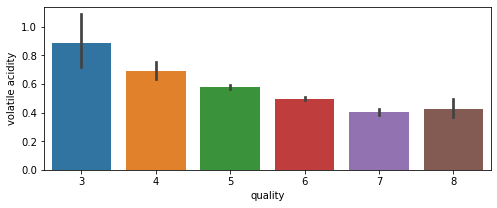

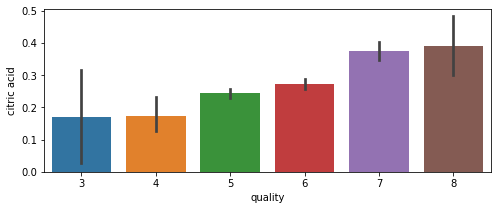

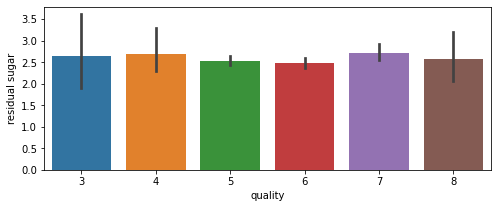

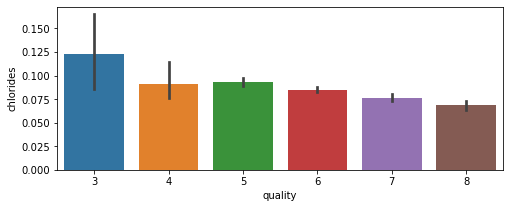

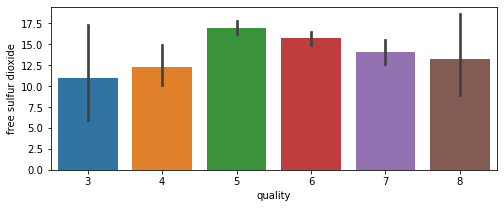

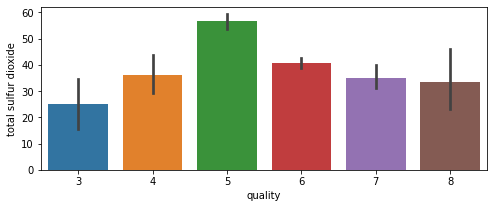

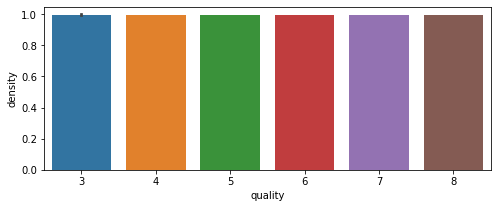

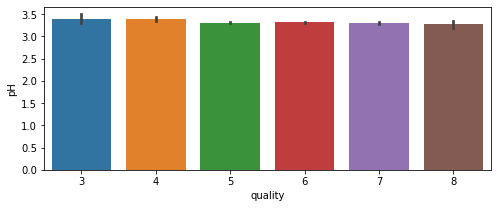

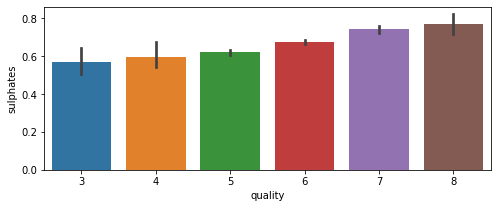

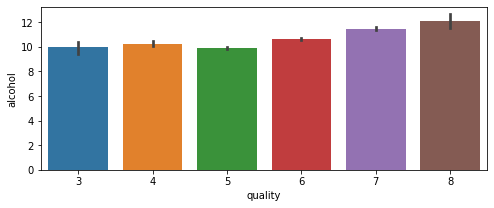

In [10]:
# Değişkenlerin şarap kalitesi ile arasındaki ilişkinin görselleştirilmesi
for col in df.columns:
    if not col == "quality":
        fig = plt.figure(figsize = (8,3))
        sns.barplot(x = 'quality', y = col, data = df)

(0.99007, 1.00369)

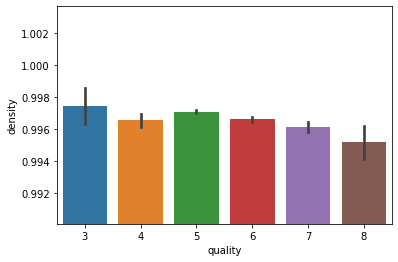

In [11]:
# density-quality ilişkisinin gösterildiği grafiğe yakından bakılması
sns.barplot(x = 'quality', y = "density", data = df)
plt.ylim(df["density"].min(),df["density"].max())

(2.74, 4.01)

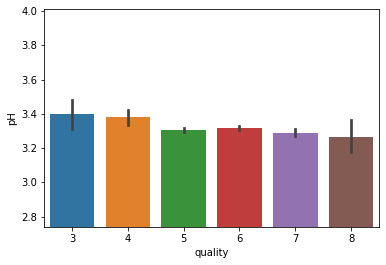

In [12]:
# pH-quality ilişkisinin gösterildiği grafiğe yakından bakılması
sns.barplot(x = 'quality', y = "pH", data = df)
plt.ylim(df["pH"].min(),df["pH"].max())

In [13]:
# Kalite değişkeninin iyi-kötü-orta olarak 3 sınıfa ayrılması
bins = (2, 4.5,6.5, 8.5)

group_names = ['kotu','orta' ,'iyi']

df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

df['quality'] = df['quality'].map( {'kotu':0, 'orta':1, 'iyi':2}) 


In [14]:
df['quality'].head()

0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [15]:
# quality özniteliği için category-> float dönüşümü yapılması
df["quality"]=df["quality"].astype(float)
df["quality"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: quality, dtype: float64

In [16]:
# Bağımlı- bağımsız değişkenlerin ayrılması
x=df.drop(columns=["quality"])
y=df["quality"]

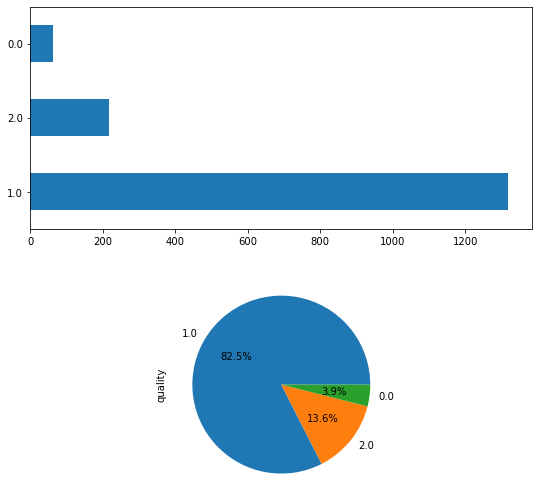

In [17]:
# Bağımlı değişkenin frekanslarının görselleştirilmesi
plt.figure(1, figsize=(9,9))
plt.subplot(2,1,1)
y.value_counts().plot(kind="barh");
plt.subplot(2,1,2)
y.value_counts().plot.pie(autopct="%1.1f%%");


Yukarıdaki pasta grafiğinde bağımlı değişkenimizin dengesiz bir dağılıma sahip olduğu görülmekte. Veri setini dengeli hale getirmenin birkaç yolu var ancak biz burada sadece bir tanesini kullanacağız. Modelin tüm sınıfları doğru bir şekilde öğrenebilmesi için frekansı düşük olan sınıfların frekansını arttıracağız 

## Aykırı değerler

In [35]:
data_num=list(x.select_dtypes(["int64","float64"]).columns)

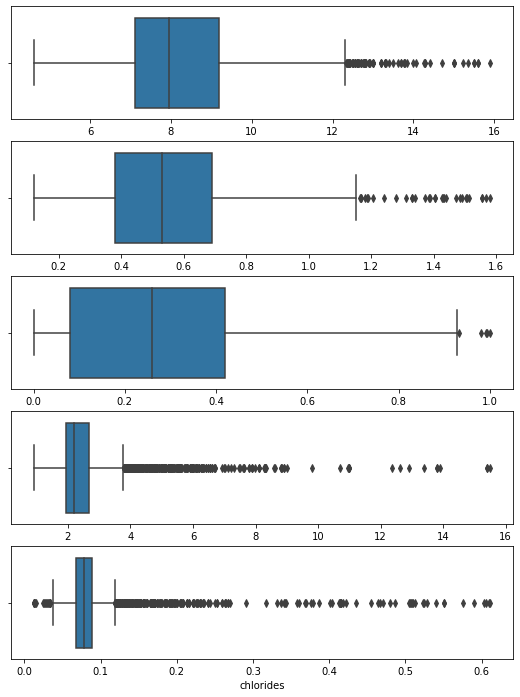

In [36]:
fig, ax =plt.subplots(nrows=5,ncols=1,figsize=(9,12))
for i in range(5):
    sns.boxplot(x = x[data_num[i]],ax=ax[i])
    

In [37]:
# Aykırı değerleri baskılayınca modellerin performansı düşüyor. O yüzden yola aykırı değerleri baskılamadan devam edeceğim. Dileyenler kodu çalıştırıp 
# kodun model performansları üzerindeki etkileri gözlemleyebilirler
'''lower_and_upper = {}

for col in data_num:
    q1 = x[col].quantile(0.25)
    q3 = x[col].quantile(0.75)
    iqr = 1.5*(q3-q1)
    
    lower_bound = q1-iqr
    upper_bound = q3+iqr
    
    lower_and_upper[col] = (lower_bound, upper_bound)
    x.loc[(x.loc[:,col]<lower_bound),col]=lower_bound*0.75
    x.loc[(x.loc[:,col]>upper_bound),col]=upper_bound*1.25
    
    
lower_and_upper'''

'lower_and_upper = {}\n\nfor col in data_num:\n    q1 = x[col].quantile(0.25)\n    q3 = x[col].quantile(0.75)\n    iqr = 1.5*(q3-q1)\n    \n    lower_bound = q1-iqr\n    upper_bound = q3+iqr\n    \n    lower_and_upper[col] = (lower_bound, upper_bound)\n    x.loc[(x.loc[:,col]<lower_bound),col]=lower_bound*0.75\n    x.loc[(x.loc[:,col]>upper_bound),col]=upper_bound*1.25\n    \n    \nlower_and_upper'

# Veri setinin dengeli hale getirilmeden önceki model performansları

### Veri setinin train ve test olarak ayrılması

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,stratify=y)

### Standart Scaler

In [39]:
x_train= StandardScaler().fit_transform(x_train)
x_test= StandardScaler().fit_transform(x_test)

### Veri setinin dengeli hale getirilmeden önceki model performanslarının görselleştirilmesi

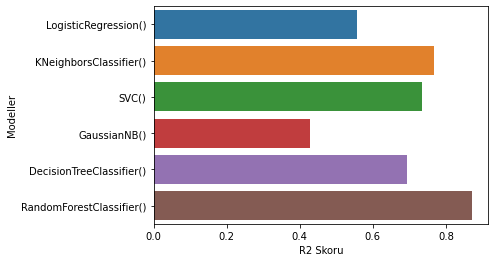

In [40]:
models=[LogisticRegression(),
        KNeighborsClassifier(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier()]
sonuclar=pd.DataFrame(columns=["Modeller","R2 Skoru"])
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=r2_score(y_test, y_pred)
    bilgiler=pd.DataFrame([[str(model),score]],columns=["Modeller","R2 Skoru"])
    sonuclar=sonuclar.append(bilgiler)
sns.barplot(x="R2 Skoru",y="Modeller",data=sonuclar);

### Veri setinin dengeli hale getirilmesi

In [41]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

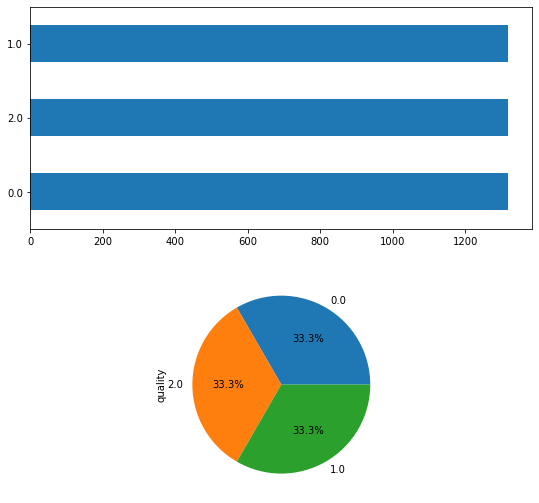

In [42]:
plt.figure(1, figsize=(9,9))
plt.subplot(2,1,1)
y.value_counts().plot(kind="barh");
plt.subplot(2,1,2)
y.value_counts().plot.pie(autopct="%1.1f%%");


### Veri setinin train ve test olarak ayrılması

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,stratify=y)

### Standart Scaler

In [44]:
x_train= StandardScaler().fit_transform(x_train)
x_test= StandardScaler().fit_transform(x_test)

### Veri setinin dengeli hale getirildikten sonraki model performanslarının görselleştirilmesi

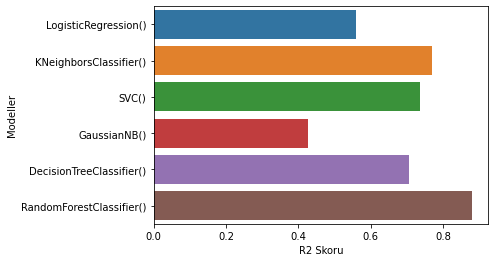

In [45]:
models=[LogisticRegression(),
        KNeighborsClassifier(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier()]
sonuclar=pd.DataFrame(columns=["Modeller","R2 Skoru"])
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=r2_score(y_test, y_pred)
    bilgiler=pd.DataFrame([[str(model),score]],columns=["Modeller","R2 Skoru"])
    sonuclar=sonuclar.append(bilgiler)
sns.barplot(x="R2 Skoru",y="Modeller",data=sonuclar);

Veri setini dengeli hale getirdiğimizde elde edilen performans daha iyi oldu. Bu nedenle, bundan sonra verinin dengeli olduğu durum için en iyi ilk 2 performansı veren modeller ele alınacaktır.

### En iyi sonuç veren ilk 2 modelin performans ölçüm metriklerinin raporlanması

In [47]:
models=[KNeighborsClassifier(),
        RandomForestClassifier()]
print("Modellerin Performans Ölçüm Metrik Sonuçları")
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores_rf = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    
    print("-"*75)
    print(str(model), ":\n")
    print('Accuracy Skoru : %.3f ' % (np.mean(scores_rf)))    
    print("-"*10)  
    print("Confusion Matrix:\n\n",confusion_matrix(y_test, y_pred))
    print("-"*10)         
    print('Clasification Report:\n', classification_report(y_test,y_pred))

Modellerin Performans Ölçüm Metrik Sonuçları
---------------------------------------------------------------------------
KNeighborsClassifier() :

Accuracy Skoru : 0.843 
----------
Confusion Matrix:

 [[429   2   4]
 [ 72 258 105]
 [  0   7 429]]
----------
Clasification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       435
         1.0       0.97      0.59      0.74       435
         2.0       0.80      0.98      0.88       436

    accuracy                           0.85      1306
   macro avg       0.87      0.85      0.84      1306
weighted avg       0.87      0.85      0.84      1306

---------------------------------------------------------------------------
RandomForestClassifier() :

Accuracy Skoru : 0.922 
----------
Confusion Matrix:

 [[422  12   1]
 [ 21 350  64]
 [  0  10 426]]
----------
Clasification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96

# ROC Curve Çizdirilmesi 

ROC Curve doğrudan binary sınıflandırmayı destekliyor ancak bağımlı değişkende 2 den fazla etiket var ise ROC Curve doğrudan çizdirilemiyor. 2'den fazla sınıfın olduğu durumlarda bağımlı değişkende label_binarize ve OneVsRestClassifier uygulanması gerekir.

### label_binarize işlemi

In [30]:
# y değişkenini sınıflara bölme. 1 kolondan 3 kolona çıkıyor böylelikle
y_train_binarized =label_binarize(y_train, classes=[0, 1, 2])
y_test_binarized=label_binarize(y_test, classes=[0, 1, 2])
#for döngüsünde kullanmak için y_lab ın kolon sayısını alma
n_classes = y_train_binarized.shape[1]
#bu y_train_binarized,y_test_binarized sadece roc curve çizdirirken kullanılacak

### En iyi sonuç veren ilk 2 modelin Roc Curve grafiğinin çizdirilmesi

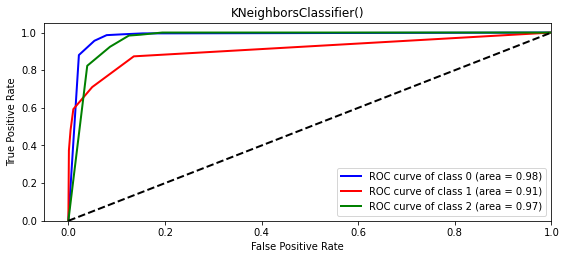

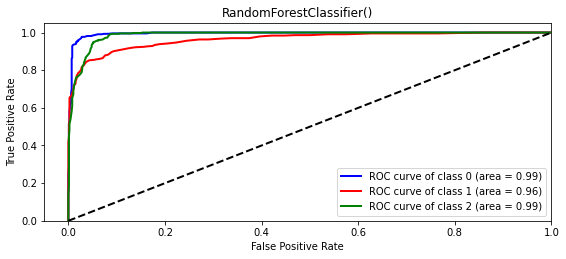

In [31]:
models=[KNeighborsClassifier(),
        RandomForestClassifier()]
k=1
for model in models:
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(x_train, y_train_binarized).predict_proba(x_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw=2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    plt.figure(figsize=(20,8))
    plt.subplot(2,2,k)
    for i, color in zip(range(n_classes), colors):

        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',)
    plt.ylabel('True Positive Rate')
    plt.title(str(model))
    plt.legend(loc="lower right")
    plt.show()
    k=k+1

### Random Forest Classifier

In [33]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


RandomForestClassifier()

### Importance Features

<AxesSubplot:>

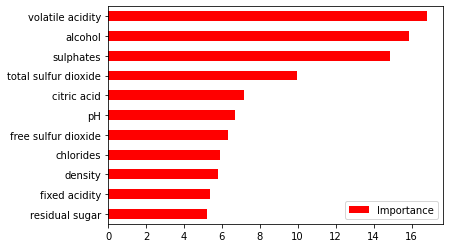

In [34]:
Importance=pd.DataFrame({"Importance":rf.feature_importances_*100},index=x.columns)
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="r")